# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

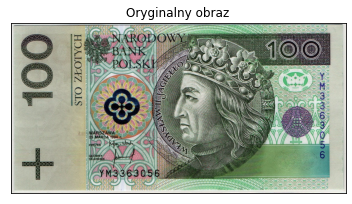

In [8]:
Im = cv2.imread("100zloty.jpg")
ImGray = cv2.cvtColor(Im, cv2.COLOR_RGB2GRAY)

bitImages = [np.zeros(ImGray.shape).astype("uint8") for _ in range(8)]

rows, cols = ImGray.shape

for i in range(rows):
    for j in range(cols):
        binary = np.binary_repr(ImGray[i][j], width=8)
        for index, bit in enumerate(binary):
            bitImages[index][i][j] = binary[index]

plt.imshow(Im)
plt.xticks([])
plt.yticks([])
plt.title("Oryginalny obraz")
plt.show()

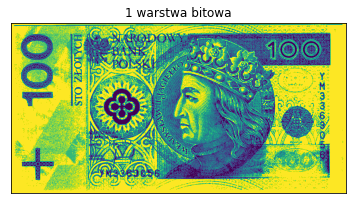

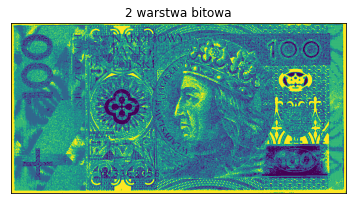

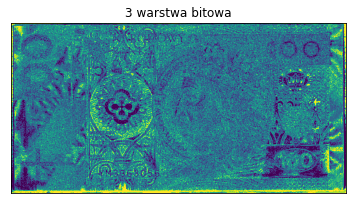

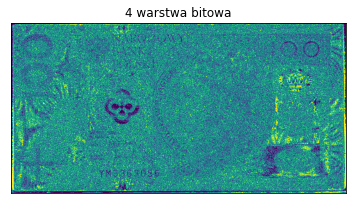

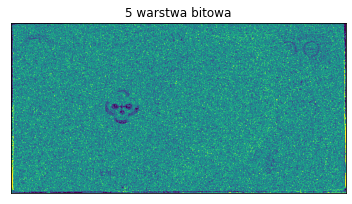

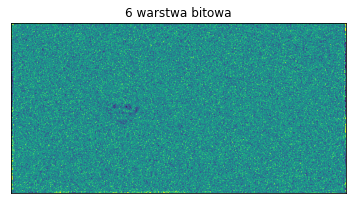

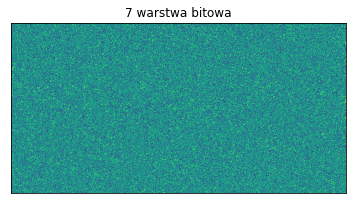

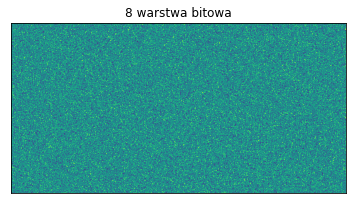

In [10]:

for index, img in enumerate(bitImages):
    plt.figure()
    plt.imshow(img)
    plt.title(f"{index + 1} warstwa bitowa")
    plt.xticks([])
    plt.yticks([])
    plt.show()

Text(0.5, 1.0, 'Oryginalny obraz')

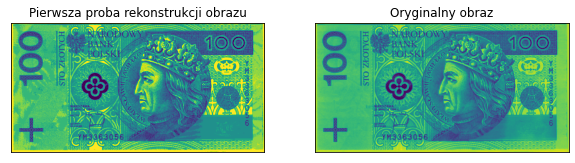

In [11]:
recoverIm1 = np.zeros(ImGray.shape)

recoverIm1 = bitImages[0] + bitImages[1]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(recoverIm1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Pierwsza proba rekonstrukcji obrazu")

ax2.imshow(ImGray)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Oryginalny obraz")


Text(0.5, 1.0, 'Oryginalny obraz')

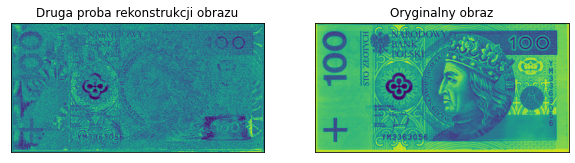

In [14]:
recoverIm2 = bitImages[2] + bitImages[3]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(recoverIm2)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Druga proba rekonstrukcji obrazu")

ax2.imshow(ImGray)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Oryginalny obraz")


Text(0.5, 1.0, 'Oryginalny obraz')

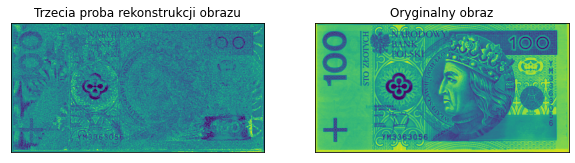

In [15]:
recoverIm3 = bitImages[3] + bitImages[6]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(recoverIm2)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Trzecia proba rekonstrukcji obrazu")

ax2.imshow(ImGray)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Oryginalny obraz")